In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [3]:
digits = load_digits() # load data directly from scikit-learn
print(digits.data.shape) # data shape: 1797 rows, 64 columns (features)

(1797, 64)


In [4]:
# data description:
# images of handwritten digits, of dimensions 8x8
# there are 1797 images and no missing data
# pixel values are in the range 0 to 16

print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
# feature/attribute names - in this case, these are 64 pixels with different
# coordinates: one feature = one pixel from the entire grid (image)
print(digits.feature_names)

# labels: digits from 0 to 9 (digit in the image)
print(digits.target_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
[0 1 2 3 4 5 6 7 8 9]


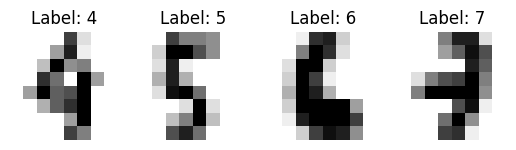

In [6]:
# show example images with labels from the dataset
fig, ax = plt.subplots(ncols=4, nrows=1)

for i in range(4):
  ax[i].set_title("Label: " + str(digits.target[i+24]))
  ax[i].axis('off')
  ax[i].imshow(digits.images[i+24], cmap='gray_r')

In [7]:
# divide the data to labels and features
X = digits.data
y = digits.target

# split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=321)

# show example labels:
y[0:100]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1])

In [8]:
# classification with the DecisionTreeClassifier

clf = tree.DecisionTreeClassifier() # classifier instance
scores = cross_val_score(clf, X, y, cv=6) # 6-fold cross-validation
print("Accuracy (mean): ", scores.mean()) # mean accuracy
print("Accuracy (all): ", scores)

# initial results are not satisfactory, accuracy ~79-80%
# we can suppose that the classifier won't be appropriate for this problem
# verify the algorithm's performance below

Accuracy (mean):  0.7885934596804162
Accuracy (all):  [0.72       0.81333333 0.73       0.84280936 0.83277592 0.79264214]


In [10]:
# train the classifier and adjust the parameters
clf = tree.DecisionTreeClassifier(max_depth=6, min_samples_split=12, min_samples_leaf=5)
clf = clf.fit(X_train, y_train)

# check if the model works properly - prediction for the training set
y_train_pred = clf.predict(X_train)
print("Accuracy (train): ", accuracy_score(y_train, y_train_pred))

# prediction for the testing set
y_test_pred = clf.predict(X_test)
print("Accuracy (test): ", accuracy_score(y_test, y_test_pred))

# for default parameters, accuracy for the training set was 100%, and for the
# testing set 85%, so the model was seriously overfitted
# the most similar results (accuracy 79-80%) have been obtained for the
# following parameters: max_depth=6, min_samples_split=12, min_samples_leaf=5
# the results confirm what the initial test showed - they aren't bad but
# could be better, so an alternative solution to the problem needs to be found

Accuracy (train):  0.8016701461377871
Accuracy (test):  0.7944444444444444


              precision    recall  f1-score   support

           0       0.97      0.96      0.97       140
           1       0.84      0.32      0.46       147
           2       0.82      0.77      0.79       137
           3       0.87      0.80      0.83       147
           4       0.91      0.87      0.89       138
           5       0.95      0.90      0.93       153
           6       0.94      0.94      0.94       143
           7       0.77      0.87      0.82       137
           8       0.47      0.79      0.59       146
           9       0.75      0.82      0.78       149

    accuracy                           0.80      1437
   macro avg       0.83      0.80      0.80      1437
weighted avg       0.83      0.80      0.80      1437



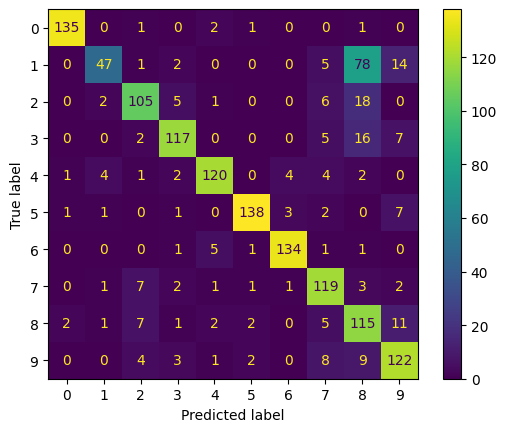

In [11]:
# classification report and confusion matrix
# (training set)
print(classification_report(y_train, y_train_pred))
cm = confusion_matrix(y_train, y_train_pred, labels=digits.target_names)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

# the most problematic classes were 1 and 8
# class 0's recognition was the most successful, with precision, recall and
# f1-score on a similar level (about 96-97%)
# based on the confusion matrix, the classes which were confused most often are:
# 1's, 2's and 3's classified as 8's, 1's classified as 9's

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       0.89      0.46      0.60        35
           2       0.78      0.80      0.79        40
           3       0.76      0.69      0.72        36
           4       0.97      0.70      0.81        43
           5       0.79      0.90      0.84        29
           6       0.95      0.92      0.93        38
           7       0.78      0.93      0.85        42
           8       0.48      0.71      0.57        28
           9       0.69      0.81      0.75        31

    accuracy                           0.79       360
   macro avg       0.81      0.79      0.79       360
weighted avg       0.82      0.79      0.79       360



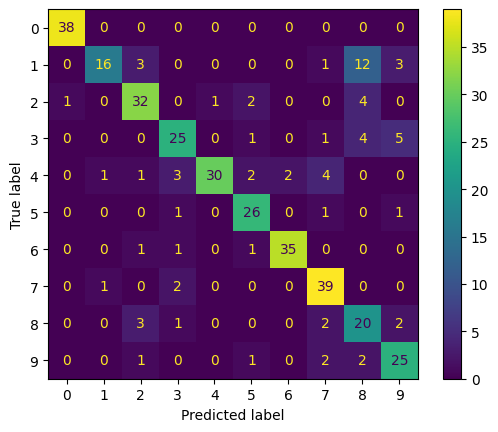

In [13]:
# (testing set)
print(classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred, labels=digits.target_names)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

# similar results for the testing set: classification of 1's as 8's was the
# most common, the metrics differ for other classes in comparison to the
# training set: a considerable difference between precision and recall
# for class 4, metrics for class 3 have smaller values (69-76%)
# classes 0 and 6 were still classified relatively well (similar results as for
# the training set)

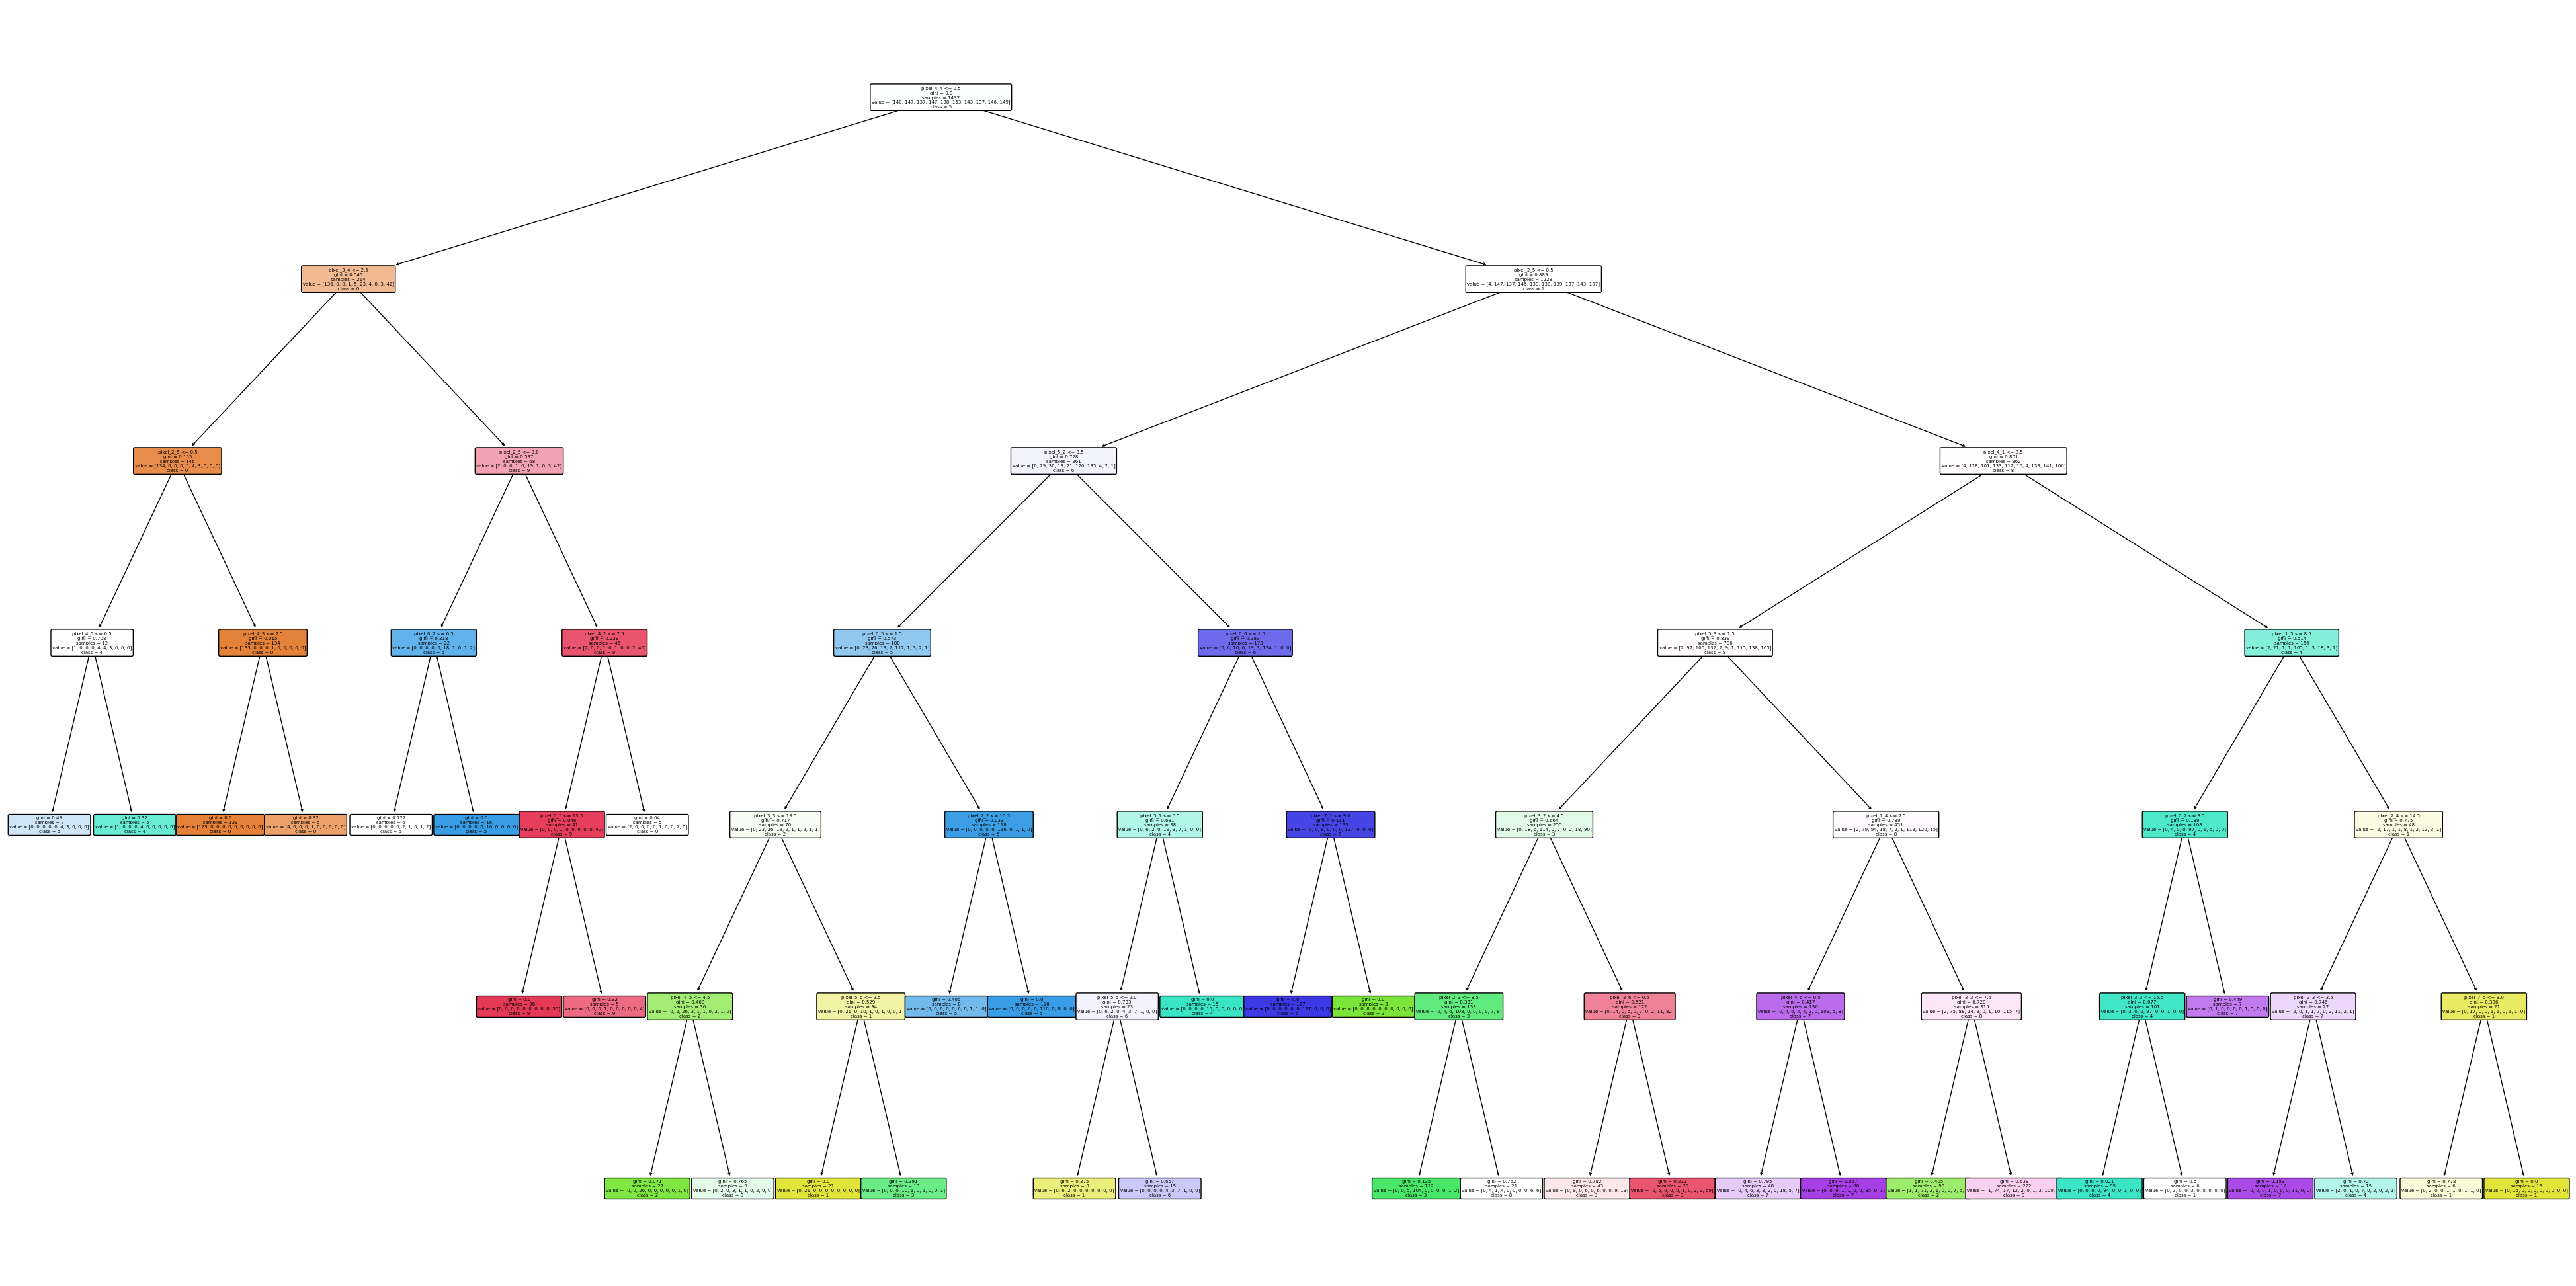

In [ ]:
# create a new list of labels for visualisation - change type from int to string

labels = []
for label in digits.target_names:
  labels.append(str(label))

# tree visualisation
plt.figure(figsize=(50, 25))
tree.plot_tree(clf, fontsize=5, filled=True, feature_names=digits.feature_names, class_names=labels, rounded=True)
plt.savefig('DT_digits.png', dpi=300) # save to png file
plt.show()

# the tree has been pruned due to the overfitting issues
# the diagram is not very clear as there are 10 classes, so it is recommended
# to save the file in a high resolution for the analysis
# the splitting criterion is a selected pixel value

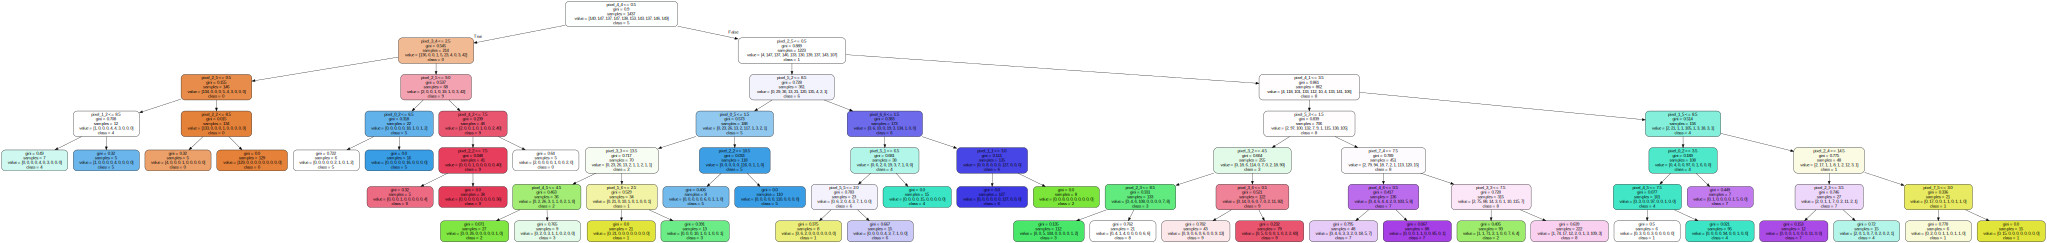

In [ ]:
# decision tree visualisation with graphviz - the leaf labels are more clear,
# but the entire tree is not visible at once (it's too big), so it's a good
# addition to the previous diagram


import graphviz

dot_data = tree.export_graphviz(clf, feature_names=digits.feature_names,
                                class_names=labels,
                                filled=True, rounded=True)

graph = graphviz.Source(dot_data)
display(graph)

In [36]:
# Random Forest classification

clf2 = RandomForestClassifier(n_estimators=12, min_samples_leaf=5) # classifier instance
clf2.fit(X_train, y_train) # train the classifier

y_train_pred = clf2.predict(X_train) # prediction for the training set
y_test_pred = clf2.predict(X_test) # prediction for the testing set

# accuracy for both sets:
print("Accuracy (train): ", accuracy_score(y_train, y_train_pred))
print("Accuracy (test): ", accuracy_score(y_test, y_test_pred))

# for the default parameters, the accuracy score was 100% for the training set,
# and 98% for the testing set
# there was a low suspicion of overfitting, but the optimisation was performed
# to check how the algorithm performs for other parameters
# number of trees has been set to 12, and minimum number of samples per leaf
# has been set to 5
# the final accuracy score for the training set was 98%, and for the testing
# set 96%

Accuracy (train):  0.9826026443980515
Accuracy (test):  0.9611111111111111


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       0.97      0.99      0.98       147
           2       0.99      1.00      1.00       137
           3       1.00      0.98      0.99       147
           4       0.99      0.97      0.98       138
           5       0.97      0.99      0.98       153
           6       0.99      0.99      0.99       143
           7       0.96      0.99      0.98       137
           8       0.97      0.96      0.97       146
           9       0.98      0.96      0.97       149

    accuracy                           0.98      1437
   macro avg       0.98      0.98      0.98      1437
weighted avg       0.98      0.98      0.98      1437



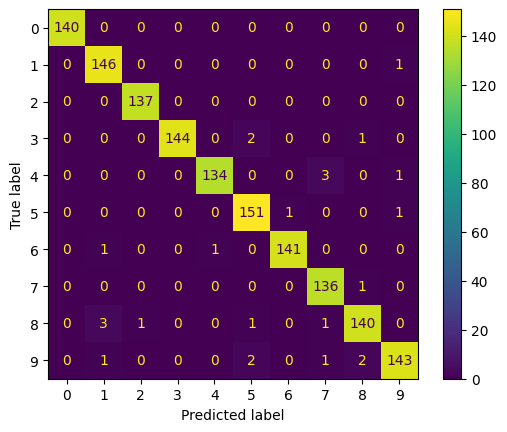

In [37]:
# classification report and confusion matrix
# training set
print(classification_report(y_train, y_train_pred))
cm = confusion_matrix(y_train, y_train_pred, labels=digits.target_names)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.90      1.00      0.95        35
           2       0.97      0.93      0.95        40
           3       1.00      0.89      0.94        36
           4       0.98      0.95      0.96        43
           5       0.90      0.97      0.93        29
           6       1.00      1.00      1.00        38
           7       1.00      0.98      0.99        42
           8       0.87      0.93      0.90        28
           9       0.97      0.97      0.97        31

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



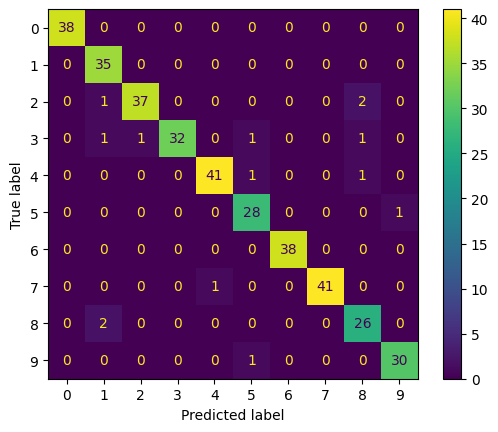

In [38]:
# testing set
print(classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred, labels=digits.target_names)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [39]:
# for this classification problem, RandomForestClassifier has proved to be
# more successful than a singular DecisionTree. The obtained accuracy, recall,
# precision and f1 scores are tremendously higher. Confusion matrices show that
# a small % of all samples was classified wrongly. The Random Forest algorithm
# eliminated the problem with 1's and 8's (in most cases), as well as helped
# shrink down the differences between metrics for separate classes, which were
# present in case of the DecisionTreeClassifier.
# The results are on a satisfactory level, so it can be said that this algorithm
# is appropriate for the given classification problem.